### 三大法人

In [1]:
import requests
import io
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from tqdm.notebook import tqdm
import matplotlib.ticker as ticker
plt.rcParams['font.family'] = 'Arial Unicode MS'

/Users/hoover/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
def daily_lpvolume(date):
    datestr = str(date)
    # 下載股價
    r = requests.get('https://www.twse.com.tw/rwd/zh/fund/T86?date=' + datestr + '&selectType=ALLBUT0999&response=csv')

    # 整理資料，變成表格
    df = pd.read_csv(io.StringIO(r.text), header=1).dropna(how='all', axis=1).dropna(how='any')
    df['證券代號'] = [str(i.replace('=', '').replace('"', '')) for i in df['證券代號']]
    df.set_index(['證券代號'], inplace=True)
    df.drop('證券名稱', axis=1, inplace=True)
    for column in df.columns:
        if df[column].dtype == object:  # Check if the column contains string values
            df[column] = df[column].str.replace(',', '').astype(int)
            
    return df

In [3]:
start_date = '2023-12-01'
end_date = '2024-01-25'
dates = pd.date_range(start=start_date, end=end_date).tolist()
formatted_dates = [date.strftime('%Y%m%d') for date in dates]
print(formatted_dates)

['20231201', '20231202', '20231203', '20231204', '20231205', '20231206', '20231207', '20231208', '20231209', '20231210', '20231211', '20231212', '20231213', '20231214', '20231215', '20231216', '20231217', '20231218', '20231219', '20231220', '20231221', '20231222', '20231223', '20231224', '20231225', '20231226', '20231227', '20231228', '20231229', '20231230', '20231231', '20240101', '20240102', '20240103', '20240104', '20240105', '20240106', '20240107', '20240108', '20240109', '20240110', '20240111', '20240112', '20240113', '20240114', '20240115', '20240116', '20240117', '20240118', '20240119', '20240120', '20240121', '20240122', '20240123', '20240124', '20240125']


In [4]:
data = {}
for i in tqdm(formatted_dates):
    fail_count = 0
    max_fail = 3
    try:
        df = daily_lpvolume(i)
        data[i] = df
    except:
        print('fail to retrieve data on ' + i)
        fail_count += 1
        if fail_count == max_fail:
            raise

    time.sleep(2.6)

# Known problem, if fetched data on weekends or holidays with no trade data, it will return error.
# In some dates, some columns contain different type of data and will report warning

  0%|          | 0/56 [00:00<?, ?it/s]

fail to retrieve data on 20231202
fail to retrieve data on 20231203
fail to retrieve data on 20231209
fail to retrieve data on 20231210
fail to retrieve data on 20231216
fail to retrieve data on 20231217
fail to retrieve data on 20231223
fail to retrieve data on 20231224
fail to retrieve data on 20231230
fail to retrieve data on 20231231
fail to retrieve data on 20240101
fail to retrieve data on 20240106
fail to retrieve data on 20240107
fail to retrieve data on 20240113
fail to retrieve data on 20240114
fail to retrieve data on 20240120
fail to retrieve data on 20240121


In [5]:
data

{'20231201':         外陸資買進股數(不含外資自營商)  外陸資賣出股數(不含外資自營商)  外陸資買賣超股數(不含外資自營商)  外資自營商買進股數  \
 證券代號                                                                       
 2609            20192050           2677299           17514751        0.0   
 2606            23252200           8367000           14885200        0.0   
 00673R            329000                 0             329000        0.0   
 2329            30213000          23221370            6991630        0.0   
 2605            14859000           5028000            9831000        0.0   
 ...                  ...               ...                ...        ...   
 00715L            856000           4318000           -3462000        0.0   
 00637L            840000           6503000           -5663000        0.0   
 2883            42257000          32778365            9478635        0.0   
 00680L           1535000            899000             636000        0.0   
 00919             748700          15257000          -14508300  

In [6]:
# Save multiple DataFrames to Excel in different sheets
with pd.ExcelWriter('TW_Stock_LPvol.xlsx') as writer:
    for sheet_name, df in tqdm(data.items()):
        df.to_excel(writer, sheet_name=sheet_name)

  0%|          | 0/39 [00:00<?, ?it/s]

In [7]:
data_readexcel = pd.read_excel('/Users/hoover/Documents/Github/TW Stock/TW_Stock_LPvol.xlsx',index_col=0 ,sheet_name=None)
data = data_readexcel
data

{'20231201':         外陸資買進股數(不含外資自營商)  外陸資賣出股數(不含外資自營商)  外陸資買賣超股數(不含外資自營商)  外資自營商買進股數  \
 證券代號                                                                       
 2609            20192050           2677299           17514751          0   
 2606            23252200           8367000           14885200          0   
 00673R            329000                 0             329000          0   
 2329            30213000          23221370            6991630          0   
 2605            14859000           5028000            9831000          0   
 ...                  ...               ...                ...        ...   
 00715L            856000           4318000           -3462000          0   
 00637L            840000           6503000           -5663000          0   
 2883            42257000          32778365            9478635          0   
 00680L           1535000            899000             636000          0   
 00919             748700          15257000          -14508300  

In [8]:
# 外資買進股數
buy_int = pd.DataFrame({a:b['外陸資買進股數(不含外資自營商)'] for a,b in data.items()}).transpose().replace(np.nan, 0)
buy_int.index = pd.to_datetime(buy_int.index)
display(buy_int.head(3), buy_int.tail(3))

證券代號,0050,0051,0052,0053,0055,0056,0057,0061,006203,006204,...,9940,9941,9941A,9942,9943,9944,9945,9946,9955,9958
2023-12-01,2251356.0,27000.0,33000.0,6000.0,25000.0,2167223.0,0.0,0.0,0.0,0.0,...,6000.0,87000.0,0.0,76000.0,38000.0,19000.0,710400.0,485000.0,99000.0,462000.0
2023-12-04,946778.0,21000.0,11000.0,0.0,8000.0,2382705.0,0.0,17000.0,0.0,3000.0,...,35000.0,191015.0,1000.0,228000.0,63000.0,16000.0,4967787.0,39000.0,1339000.0,1442000.0
2023-12-05,581724.0,2000.0,25080.0,4000.0,22000.0,1267132.0,0.0,0.0,0.0,0.0,...,91000.0,152000.0,1000.0,43000.0,8000.0,10000.0,428000.0,36000.0,291000.0,3104000.0


證券代號,0050,0051,0052,0053,0055,0056,0057,0061,006203,006204,...,9940,9941,9941A,9942,9943,9944,9945,9946,9955,9958
2024-01-23,4189305.0,12000.0,20000.0,0.0,32000.0,6731500.0,0.0,12000.0,0.0,2000.0,...,5000.0,48040.0,2000.0,21000.0,7000.0,35000.0,609350.0,43002.0,14000.0,4291000.0
2024-01-24,9326136.0,1000.0,0.0,1000.0,24000.0,3038994.0,0.0,135000.0,0.0,0.0,...,20000.0,49000.0,1000.0,30000.0,72000.0,30000.0,1282000.0,416000.0,114000.0,1929000.0
2024-01-25,21855529.0,1060.0,28000.0,1000.0,22000.0,5101950.0,0.0,48000.0,0.0,0.0,...,17000.0,48000.0,4000.0,6000.0,7000.0,8000.0,594100.0,44000.0,3000.0,958000.0


In [9]:
# 外資賣出股數
sell_int = pd.DataFrame({a:b['外陸資賣出股數(不含外資自營商)'] for a,b in data.items()}).transpose().replace(np.nan, 0)
sell_int.index = pd.to_datetime(sell_int.index)
display(sell_int.head(3), sell_int.tail(3))

證券代號,0050,0051,0052,0053,0055,0056,0057,0061,006203,006204,...,9940,9941,9941A,9942,9943,9944,9945,9946,9955,9958
2023-12-01,2329847.0,0.0,2000.0,0.0,37000.0,628100.0,0.0,1000.0,0.0,1000.0,...,168000.0,196500.0,0.0,74000.0,18850.0,11000.0,2341000.0,163000.0,48000.0,862000.0
2023-12-04,2080868.0,23000.0,7000.0,0.0,32000.0,439500.0,0.0,3000.0,0.0,0.0,...,29000.0,194000.0,0.0,37000.0,81000.0,5000.0,2631151.0,246000.0,704000.0,753000.0
2023-12-05,1722215.0,13000.0,24000.0,0.0,21000.0,4536150.0,0.0,2000.0,0.0,1000.0,...,38000.0,213000.0,0.0,81000.0,55000.0,1000.0,3311000.0,212000.0,606000.0,2100900.0


證券代號,0050,0051,0052,0053,0055,0056,0057,0061,006203,006204,...,9940,9941,9941A,9942,9943,9944,9945,9946,9955,9958
2024-01-23,126210.0,0.0,3000.0,1000.0,0.0,180000.0,0.0,5000.0,0.0,0.0,...,8000.0,345924.0,0.0,41000.0,20000.0,8000.0,979035.0,111000.0,24000.0,2927492.0
2024-01-24,1697770.0,0.0,2000.0,0.0,0.0,5000.0,0.0,136000.0,0.0,10000.0,...,23000.0,164000.0,0.0,30000.0,27000.0,8000.0,680135.0,134000.0,3000.0,1246100.0
2024-01-25,2068950.0,4000.0,0.0,0.0,0.0,536500.0,0.0,42000.0,5000.0,0.0,...,2000.0,104000.0,0.0,55000.0,7000.0,1000.0,709400.0,28000.0,39000.0,1808000.0


In [10]:
# 外資買賣超股數
bal_int = pd.DataFrame({a:b['外陸資買賣超股數(不含外資自營商)'] for a,b in data.items()}).transpose().replace(np.nan, 0)
bal_int.index = pd.to_datetime(bal_int.index)
display(bal_int.head(3), bal_int.tail(3))

證券代號,0050,0051,0052,0053,0055,0056,0057,0061,006203,006204,...,9940,9941,9941A,9942,9943,9944,9945,9946,9955,9958
2023-12-01,-78491.0,27000.0,31000.0,6000.0,-12000.0,1539123.0,0.0,-1000.0,0.0,-1000.0,...,-162000.0,-109500.0,0.0,2000.0,19150.0,8000.0,-1630600.0,322000.0,51000.0,-400000.0
2023-12-04,-1134090.0,-2000.0,4000.0,0.0,-24000.0,1943205.0,0.0,14000.0,0.0,3000.0,...,6000.0,-2985.0,1000.0,191000.0,-18000.0,11000.0,2336636.0,-207000.0,635000.0,689000.0
2023-12-05,-1140491.0,-11000.0,1080.0,4000.0,1000.0,-3269018.0,0.0,-2000.0,0.0,-1000.0,...,53000.0,-61000.0,1000.0,-38000.0,-47000.0,9000.0,-2883000.0,-176000.0,-315000.0,1003100.0


證券代號,0050,0051,0052,0053,0055,0056,0057,0061,006203,006204,...,9940,9941,9941A,9942,9943,9944,9945,9946,9955,9958
2024-01-23,4063095.0,12000.0,17000.0,-1000.0,32000.0,6551500.0,0.0,7000.0,0.0,2000.0,...,-3000.0,-297884.0,2000.0,-20000.0,-13000.0,27000.0,-369685.0,-67998.0,-10000.0,1363508.0
2024-01-24,7628366.0,1000.0,-2000.0,1000.0,24000.0,3033994.0,0.0,-1000.0,0.0,-10000.0,...,-3000.0,-115000.0,1000.0,0.0,45000.0,22000.0,601865.0,282000.0,111000.0,682900.0
2024-01-25,19786579.0,-2940.0,28000.0,1000.0,22000.0,4565450.0,0.0,6000.0,-5000.0,0.0,...,15000.0,-56000.0,4000.0,-49000.0,0.0,7000.0,-115300.0,16000.0,-36000.0,-850000.0


In [11]:
# 外資自營商買賣超
bal_intib = pd.DataFrame({a:b['外資自營商買賣超股數'] for a,b in data.items()}).transpose().replace(np.nan, 0)
bal_intib.index = pd.to_datetime(bal_intib.index)
display(bal_intib.head(3), bal_intib.tail(3))

證券代號,0050,0051,0052,0053,0055,0056,0057,0061,006203,006204,...,9940,9941,9941A,9942,9943,9944,9945,9946,9955,9958
2023-12-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-12-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-12-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


證券代號,0050,0051,0052,0053,0055,0056,0057,0061,006203,006204,...,9940,9941,9941A,9942,9943,9944,9945,9946,9955,9958
2024-01-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-01-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-01-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
# 投信買進股數
buy_mut = pd.DataFrame({a:b['投信買進股數'] for a,b in data.items()}).transpose().replace(np.nan, 0)
buy_mut.index = pd.to_datetime(buy_mut.index)
display(buy_mut.head(3), buy_mut.tail(3))

證券代號,0050,0051,0052,0053,0055,0056,0057,0061,006203,006204,...,9940,9941,9941A,9942,9943,9944,9945,9946,9955,9958
2023-12-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-12-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-12-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,955000.0


證券代號,0050,0051,0052,0053,0055,0056,0057,0061,006203,006204,...,9940,9941,9941A,9942,9943,9944,9945,9946,9955,9958
2024-01-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-01-24,0.0,0.0,70000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-01-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
# 投信賣出股數
sell_mut = pd.DataFrame({a:b['投信賣出股數'] for a,b in data.items()}).transpose().replace(np.nan, 0)
sell_mut.index = pd.to_datetime(sell_mut.index)
display(sell_mut.head(3), sell_mut.tail(3))

證券代號,0050,0051,0052,0053,0055,0056,0057,0061,006203,006204,...,9940,9941,9941A,9942,9943,9944,9945,9946,9955,9958
2023-12-01,0.0,0.0,0.0,0.0,0.0,2025000.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-12-04,0.0,0.0,0.0,0.0,0.0,2027000.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-12-05,0.0,0.0,0.0,0.0,0.0,1950000.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


證券代號,0050,0051,0052,0053,0055,0056,0057,0061,006203,006204,...,9940,9941,9941A,9942,9943,9944,9945,9946,9955,9958
2024-01-23,0.0,0.0,4000.0,0.0,0.0,1270000.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,131000.0
2024-01-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70000.0
2024-01-25,0.0,0.0,109000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,106014.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
# 投信買賣超股數
bal_mut = pd.DataFrame({a:b['投信買賣超股數'] for a,b in data.items()}).transpose().replace(np.nan, 0)
bal_mut.index = pd.to_datetime(bal_mut.index)
display(bal_mut.head(3), bal_mut.tail(3))

證券代號,0050,0051,0052,0053,0055,0056,0057,0061,006203,006204,...,9940,9941,9941A,9942,9943,9944,9945,9946,9955,9958
2023-12-01,0.0,0.0,0.0,0.0,0.0,-2025000.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-12-04,0.0,0.0,0.0,0.0,0.0,-2027000.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-12-05,0.0,0.0,0.0,0.0,0.0,-1950000.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,955000.0


證券代號,0050,0051,0052,0053,0055,0056,0057,0061,006203,006204,...,9940,9941,9941A,9942,9943,9944,9945,9946,9955,9958
2024-01-23,0.0,0.0,-4000.0,0.0,0.0,-1270000.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-131000.0
2024-01-24,0.0,0.0,70000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-70000.0
2024-01-25,0.0,0.0,-109000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-106014.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
# 自營商買賣超股數
bal_ib = pd.DataFrame({a:b['自營商買賣超股數'] for a,b in data.items()}).transpose().replace(np.nan, 0)
bal_ib.index = pd.to_datetime(bal_ib.index)
display(bal_ib.head(3), bal_ib.tail(3))

證券代號,0050,0051,0052,0053,0055,0056,0057,0061,006203,006204,...,9940,9941,9941A,9942,9943,9944,9945,9946,9955,9958
2023-12-01,366983.0,-1288.0,91519.0,-837.0,-19124.0,5498344.0,-1000.0,-88793.0,0.0,1797.0,...,-5423.0,-4031.0,0.0,1000.0,0.0,0.0,-9000.0,26000.0,0.0,26672.0
2023-12-04,-391828.0,41508.0,-20535.0,3952.0,-3007.0,1992046.0,-498.0,-52782.0,-1000.0,15680.0,...,0.0,-10000.0,0.0,-1000.0,1.0,3000.0,92731.0,36000.0,-5000.0,194832.0
2023-12-05,-1362560.0,-19561.0,30130.0,5586.0,43343.0,-3546082.0,-2473.0,62428.0,-1000.0,-1952.0,...,-5000.0,-36795.0,0.0,1000.0,-1000.0,0.0,-96828.0,0.0,1000.0,509711.0


證券代號,0050,0051,0052,0053,0055,0056,0057,0061,006203,006204,...,9940,9941,9941A,9942,9943,9944,9945,9946,9955,9958
2024-01-23,196454.0,8934.0,115027.0,-358.0,-1673.0,3848387.0,20060.0,-255598.0,5000.0,-234.0,...,-45.0,1000.0,0.0,0.0,6000.0,0.0,93914.0,-3000.0,0.0,137114.0
2024-01-24,3759137.0,-20155.0,37907.0,169.0,11907.0,7711175.0,1293.0,-326530.0,0.0,22320.0,...,-19009.0,-2000.0,0.0,0.0,-17197.0,0.0,-123173.0,-1000.0,0.0,-649579.0
2024-01-25,1153431.0,-12589.0,75977.0,2548.0,2757.0,7927817.0,1040.0,-260393.0,11000.0,11979.0,...,-6000.0,2000.0,0.0,2020.0,-92.0,0.0,73209.0,0.0,0.0,53367.0


In [16]:
# 三大法人買賣超股數
bal_all = pd.DataFrame({a:b['三大法人買賣超股數'] for a,b in data.items()}).transpose().replace(np.nan, 0)
bal_all.index = pd.to_datetime(bal_all.index)
display(bal_all.head(3), bal_all.tail(3))

證券代號,0050,0051,0052,0053,0055,0056,0057,0061,006203,006204,...,9940,9941,9941A,9942,9943,9944,9945,9946,9955,9958
2023-12-01,288492.0,25712.0,122519.0,5163.0,-31124.0,5012467.0,-1000.0,-89793.0,0.0,797.0,...,-167423.0,-113531.0,0.0,3000.0,19150.0,8000.0,-1639600.0,348000.0,51000.0,-373328.0
2023-12-04,-1525918.0,39508.0,-16535.0,3952.0,-27007.0,1908251.0,-498.0,-38782.0,-1000.0,18680.0,...,6000.0,-12985.0,1000.0,190000.0,-17999.0,14000.0,2429367.0,-171000.0,630000.0,883832.0
2023-12-05,-2503051.0,-30561.0,31210.0,9586.0,44343.0,-8765100.0,-2473.0,60428.0,-1000.0,-2952.0,...,48000.0,-97795.0,1000.0,-37000.0,-48000.0,9000.0,-2979828.0,-176000.0,-314000.0,2467811.0


證券代號,0050,0051,0052,0053,0055,0056,0057,0061,006203,006204,...,9940,9941,9941A,9942,9943,9944,9945,9946,9955,9958
2024-01-23,4259549.0,20934.0,128027.0,-1358.0,30327.0,9129887.0,20060.0,-248598.0,5000.0,1766.0,...,-3045.0,-296884.0,2000.0,-20000.0,-7000.0,27000.0,-275771.0,-70998.0,-10000.0,1369622.0
2024-01-24,11387503.0,-19155.0,105907.0,1169.0,35907.0,10745169.0,1293.0,-327530.0,0.0,12320.0,...,-22009.0,-117000.0,1000.0,0.0,27803.0,22000.0,478692.0,281000.0,111000.0,-36679.0
2024-01-25,20940010.0,-15529.0,-5023.0,3548.0,24757.0,12493267.0,1040.0,-254393.0,6000.0,11979.0,...,9000.0,-160014.0,4000.0,-46980.0,-92.0,7000.0,-42091.0,16000.0,-36000.0,-796633.0


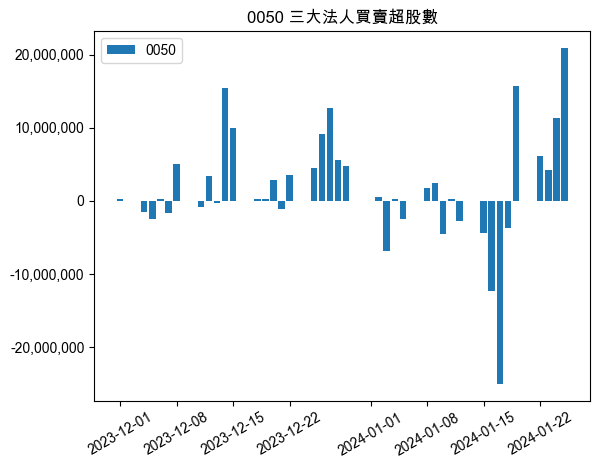

In [17]:
stockticker = '0050'
plt.bar(bal_all[stockticker].index, height=bal_all[stockticker])
#plt.plot(bal_all[stockticker])
plt.title(stockticker + ' 三大法人買賣超股數')
plt.legend([stockticker])
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: format(int(x), ',')))
plt.xticks(rotation=30)

plt.show()

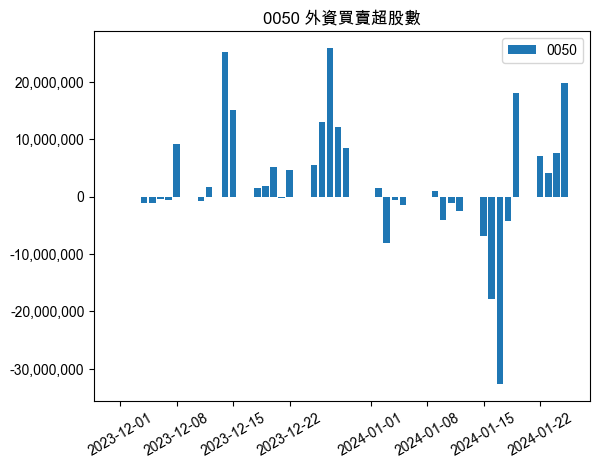

In [18]:
stockticker = '0050'
plt.bar(bal_int[stockticker].index, height=bal_int[stockticker])
plt.title(stockticker + ' 外資買賣超股數')
plt.legend([stockticker])
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: format(int(x), ',')))
plt.xticks(rotation=30)

plt.show()

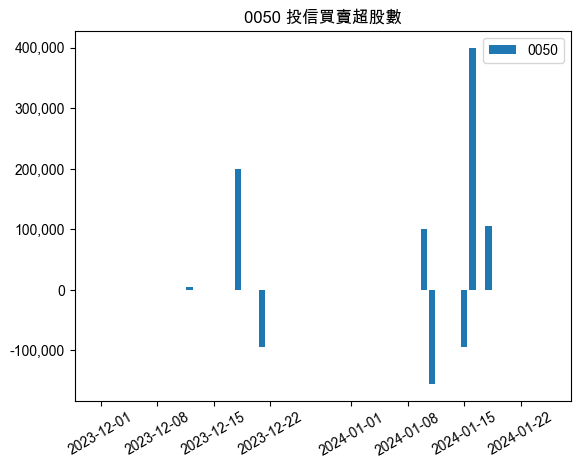

In [19]:
stockticker = '0050'
plt.bar(bal_mut[stockticker].index, height=bal_mut[stockticker])
plt.title(stockticker + ' 投信買賣超股數')
plt.legend([stockticker])
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: format(int(x), ',')))
plt.xticks(rotation=30)

plt.show()